## Chi-square Test

In [2]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [3]:
# Read in data
file_path = "../main_resources/hc_workers/clean_renamed_hcw_df.csv"
cleaned_df = pd.read_csv(file_path)
cleaned_df.columns

Index(['date', 'age', 'gender', 'state', 'education_level', 'marital_status',
       'tested_positive_self', 'tested_positive_ff', 'living_with',
       'anxiety_diagnosed', 'contact_patients', 'job_description',
       'scared_people_reaction', 'denied_by_community', 'family_fear',
       'support_from', 'difficulties_with', 'protection_provided',
       'aggretions_fear', 'colapsed_by_news', 'insomnia', 'frozen_by_info',
       'appetite_loss', 'nauseated_by_info', 'fear_of_infection_self',
       'fear_of_infection_ff', 'anxiety_covid', 'dreams_covid',
       'energized_at_work', 'vigorous_at_work', 'enthusiastic_at_work',
       'inspired_at_work', 'motivated_at_work', 'happy_at_work',
       'proud_at_work', 'immersed_at_work', 'carried_away_at_work',
       'feel_angry', 'feel_anxious', 'feel_at_ease', 'feel_bored', 'feel_calm',
       'feel_content', 'feel_depressed', 'feel_discouraged', 'feel_disgusted',
       'feel_ecstatic', 'feel_energetic', 'feel_enthusiastic', 'feel_excit

### 1. Define the null hypothesis (H<sub>0</sub>) and the alternative hypothesis (H<sub>a</sub>).
* H<sub>0</sub>: There is no association between the two categorical variables.
* H<sub>a</sub>: There is an association between the two categorical variables.

### 2. Construct a contingency table.

In [4]:
# Construct a contingency table.
contingency_table = pd.crosstab(index=cleaned_df["job_description"], columns=cleaned_df["feel_anxious"])
contingency_table

feel_anxious,1,2,3,4,5
job_description,,,,,
Consultant,13,13,8,2,0
Doctor,19,24,13,8,1
Grade four staff,1,0,4,0,0
Grade three staff,14,3,2,1,7
Middle management,17,5,10,1,7
Nursing staff,14,12,9,6,10
Top management,7,3,0,1,0


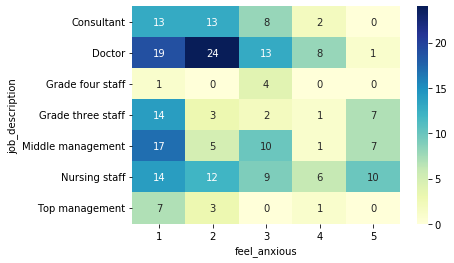

In [7]:
# Plot heatmap
plot = sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt='g')
fig = plot.get_figure()
fig.savefig("../Images/contingency_table.png")
plt.show()

### 3. Calculate the expected frequencies for each cell in the contingency table.

In [9]:
# Calculate the expected frequencies for each cell in the contingency table.
c, p, dof, expected = st.chi2_contingency(contingency_table)
expected

array([[13.0212766 ,  9.19148936,  7.04680851,  2.9106383 ,  3.82978723],
       [23.5106383 , 16.59574468, 12.72340426,  5.25531915,  6.91489362],
       [ 1.80851064,  1.27659574,  0.9787234 ,  0.40425532,  0.53191489],
       [ 9.76595745,  6.89361702,  5.28510638,  2.18297872,  2.87234043],
       [14.46808511, 10.21276596,  7.82978723,  3.23404255,  4.25531915],
       [18.44680851, 13.0212766 ,  9.98297872,  4.12340426,  5.42553191],
       [ 3.9787234 ,  2.80851064,  2.15319149,  0.8893617 ,  1.17021277]])

### 4. Calculate the Chi-Square statistic.

In [12]:
chi2stat, chi2stat_p_value = st.chisquare(contingency_table, expected)

print(chi2stat)
print(chi2stat.sum())
print(c)

[ 6.87181945 11.11110759 14.35495406  5.17475892 22.15024719]
59.662887210967924
59.66288721096792


### 5. Determine degree of freedom

In [14]:
# Determine degree of freedom = (row - 1)*(column - 1) = (7-1) * (5-1)
dof 

24

### 6. Look up the critical value of the Chi-Square distribution.

In [16]:
# Look up the critical value of the Chi-Square distribution.
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = st.chi2.ppf(q = 0.95, df = dof)

# The critical value
critical_value

36.41502850180731

### 7. Compare the calculated Chi-Square value to the critical value.
* Since the chi square value of 59.66 exceeds the critical value of 36.42, we can reject the null hypothesis. We can conclude that the results are statistically significant.

### 8. Interpret the results.
* There is an association between job function and the level of anxiety.